In [1]:
!/usr/bin/python3 -m pip install --upgrade pip
!/usr/bin/python3 -m pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# newest Python
!/opt/python/latest/bin/python -m pip install matplotlib
!/opt/python/latest/bin/python -m pip install requests
!/opt/python/latest/bin/python -m pip install json
!/opt/python/latest/bin/python -m pip install IPython

In [2]:
# actual 3.x Python
!/usr/bin/python3 -m pip install matplotlib
!/usr/bin/python3 -m pip install requests
!/usr/bin/python3 -m pip install json
!/usr/bin/python3 -m pip install IPython
!/usr/bin/python3 -m pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement json
ERROR: No matching distribution found for json
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import IPython

from matplotlib import patches
from PIL import Image
from io import BytesIO
from pprint import pprint
from xml.etree import ElementTree


In [4]:
# Add your Cognitive Services subscription key and endpoint
subscription_key = '465a1dad56914c7da963497e7fb4d276'
endpoint = 'https://cogservthomas.cognitiveservices.azure.com/'
imagecontainerlink = 'https://raw.githubusercontent.com/tvonment/jupyter-cognitiveservices/main/images/'
region = "switzerlandnorth"

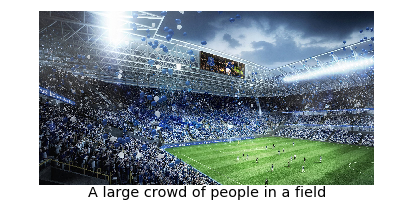

{'categories': [{'detail': {'landmarks': []},
                 'name': 'outdoor_',
                 'score': 0.00390625},
                {'detail': {'landmarks': []},
                 'name': 'outdoor_sportsfield',
                 'score': 0.921875}],
 'color': {'accentColor': '5B8E3D',
           'dominantColorBackground': 'Green',
           'dominantColorForeground': 'White',
           'dominantColors': ['Green', 'Grey', 'Black'],
           'isBWImg': False,
           'isBwImg': False},
 'description': {'captions': [{'confidence': 0.8136245971720739,
                               'text': 'a large crowd of people in a field'}],
                 'tags': ['grass',
                          'large',
                          'building',
                          'field',
                          'people',
                          'view',
                          'sheep',
                          'hill',
                          'standing',
                          'game',
  

In [5]:
# Computer Vision

analyze_url = endpoint + "vision/v2.1/analyze"
#(https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa)


# Set image_url to the URL of an image that you want to analyze.
image_url = imagecontainerlink + "stadion.jpg"
#image_url = imagecontainerlink + "handofthequeen.png"
#image_url = imagecontainerlink + "ms_shirt.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
#params = {'visualFeatures': 'Brands,Description,Color'}

data = {'url': image_url}
response = requests.post(analyze_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()

#print(json.dumps(response.json(), indent=2))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

pprint(analysis)

In [ ]:
# Text Analytics
## Language

language_api_url = endpoint + "text/analytics/v2.0/languages"

documents = { 'documents': [
    { 'id': '1', 'text': 'This is a document written in English.' },
    { 'id': '2', 'text': 'Este es un document escrito en Español.' },
    { 'id': '3', 'text': '这是一个用中文写的文件' }
]}

headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(language_api_url, headers=headers, json=documents)
languages = response.json()
pprint(languages)

In [ ]:
# Text Analytics
## Sentiment

sentiment_api_url = endpoint + "text/analytics/v2.0/sentiment"

documents = {'documents' : [
  {'id': '1', 'language': 'en', 'text': 'I had a wonderful experience! The rooms were wonderful and the staff was helpful.'},
  {'id': '2', 'language': 'en', 'text': 'I had a terrible time at the hotel. The staff was rude and the food was awful.'},  
  {'id': '3', 'language': 'es', 'text': 'Los caminos que llevan hasta Monte Rainier son espectaculares y hermosos.'},  
  {'id': '4', 'language': 'de', 'text': 'Ich bin nicht sicher ob das ein gutes Auto ist?'}
]}

headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
pprint(sentiments)

In [ ]:
# Text Analytics
## Key Phrases

key_phrase_api_url = endpoint + "text/analytics/v2.0/keyPhrases"
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}

response  = requests.post(key_phrase_api_url, headers=headers, json=documents)
key_phrases = response.json()
pprint(key_phrases)

In [ ]:
# Speech

# Download the audio file
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/RainSpain.wav -o RainSpain.wav
    
# Play the audio
IPython.display.Audio('RainSpain.wav', autoplay=True)

In [ ]:
# Speech to Text
with open("RainSpain.wav", mode="rb") as audio_file:
        audio_data =  audio_file.read()
        
# The Speech API requires an access token (valid for 10 mins)
apiEndPoint = "https://" + region + ".api.cognitive.microsoft.com/sts/v1.0/issueToken"
headers = {"Ocp-Apim-Subscription-Key": subscription_key}

# Use the API key to request an access token
response = requests.post(apiEndPoint, headers=headers)
accesstoken = str(response.text)

# Now that we have a token, we can set up the request
speechToTextEndPoint = "https://" + region + ".stt.speech.microsoft.com/speech/recognition/conversation/cognitiveservices/v1"
headers = {"Content-type": "audio/wav; codec=audio/pcm; samplerate=16000", 
           "Authorization": "Bearer " + accesstoken}
params = {"language":"en-US"}
body = audio_data

# Connect to server, post the request, and get the result
response = requests.post(speechToTextEndPoint,data=body, params=params, headers=headers)
result = str(response.text)
print(json.loads(result)['DisplayText'])

pprint(json.loads(result))

In [ ]:
# Text to Speech
# Get the input text

myText = input('What would you like me to say?: \n')
        
# The Speech API requires an access token (valid for 10 mins)
apiEndPoint = "https://" + region + ".api.cognitive.microsoft.com/sts/v1.0/issueToken"
headers = {"Ocp-Apim-Subscription-Key": subscription_key}

# Use the API key to request an access token
response = requests.post(apiEndPoint, headers=headers)
accesstoken = str(response.text)

# Now that we have a token, we can set up the request
textToSpeechEndPoint = "https://" + region + ".tts.speech.microsoft.com/cognitiveservices/v1"
headers = {"Content-type": "application/ssml+xml",
           'X-Microsoft-OutputFormat': 'riff-16khz-16bit-mono-pcm',
           'User-Agent': 'speech',
           "Authorization": "Bearer " + accesstoken}

# The request body is XML
body = "<speak version='1.0' xml:lang='en-US'>\
          <voice xml:lang='en-US'\
                 xml:gender='Female'\
                 name='Microsoft Server Speech Text to Speech Voice (en-US, ZiraRUS)'>" + myText + "</voice>\
        </speak>"


# Connect to server, post the request, and get the result
response = requests.post(textToSpeechEndPoint,data=body, headers=headers)

#Play the audio
IPython.display.Audio(response.content, autoplay=True)

In [ ]:
# Face API

face_api_url = endpoint + 'face/v1.0/detect'
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
print("detected " + str(len(faces)) + " faces")
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")
plt.show()

pprint(faces)

In [ ]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main002.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main004.jpg")